# Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

## Hirerical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Checking Outliers

In [9]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22)):

SyntaxError: invalid syntax (<ipython-input-9-b8e5bc7793ab>, line 1)

# Outlier Treatment Manually

In [10]:
# first Column
iqr = df['Malic'].quantile(0.75) - df['Malic'].quantile(0.25)
iqr

1.4799999999999998

In [11]:
lower_limit = df['Malic'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.6174999999999995

In [12]:
upper_limit = df['Malic'].quantile(0.75) + 1.5*(iqr)
upper_limit

5.3025

In [13]:
df['Malic'] = np.where(df['Malic'] > upper_limit, upper_limit, np.where(df['Malic'] < lower_limit, lower_limit, df['Malic']))

In [14]:
# Second Column
iqr = df['Ash'].quantile(0.75) - df['Ash'].quantile(0.25)
iqr

0.34750000000000014

In [15]:
lower_limit = df['Ash'].quantile(0.25) - 1.5*(iqr)
lower_limit

1.6887499999999998

In [16]:
upper_limit = df['Ash'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0787500000000003

In [17]:
df['Ash'] = np.where(df['Ash'] > upper_limit, upper_limit, np.where(df['Ash'] < lower_limit, lower_limit, df['Ash']))

In [18]:
# Third column
iqr = df['Alcalinity'].quantile(0.75) - df['Alcalinity'].quantile(0.25)
iqr

4.300000000000001

In [19]:
lower_limit = df['Alcalinity'].quantile(0.25) - 1.5*(iqr)
lower_limit

10.749999999999998

In [20]:
upper_limit = df['Alcalinity'].quantile(0.75) + 1.5*(iqr)
upper_limit

27.950000000000003

In [21]:
df['Alcalinity'] = np.where(df['Alcalinity'] > upper_limit, upper_limit, np.where(df['Alcalinity'] < lower_limit, lower_limit, df['Alcalinity']))

In [22]:
# Forth column
iqr = df['Magnesium'].quantile(0.75) - df['Magnesium'].quantile(0.25)
iqr

19.0

In [23]:
lower_limit = df['Magnesium'].quantile(0.25) - 1.5*(iqr)
lower_limit

59.5

In [24]:
upper_limit = df['Magnesium'].quantile(0.75) + 1.5*(iqr)
upper_limit

135.5

In [25]:
df['Magnesium'] = np.where(df['Magnesium'] > upper_limit, upper_limit, np.where(df['Magnesium'] < lower_limit, lower_limit, df['Magnesium']))

In [26]:
# Fifth column
iqr = df['Proanthocyanins'].quantile(0.75) - df['Proanthocyanins'].quantile(0.25)
iqr

0.7

In [27]:
lower_limit = df['Proanthocyanins'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.20000000000000018

In [28]:
upper_limit = df['Proanthocyanins'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0

In [29]:
df['Proanthocyanins'] = np.where(df['Proanthocyanins'] > upper_limit, upper_limit, np.where(df['Proanthocyanins'] < lower_limit, lower_limit, df['Proanthocyanins']))

In [30]:
# Sixth column
iqr = df['Color'].quantile(0.75) - df['Color'].quantile(0.25)
iqr

2.9800000000000004

In [31]:
lower_limit = df['Color'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.2500000000000009

In [32]:
upper_limit = df['Color'].quantile(0.75) + 1.5*(iqr)
upper_limit

10.670000000000002

In [33]:
df['Color'] = np.where(df['Color'] > upper_limit, upper_limit, np.where(df['Color'] < lower_limit, lower_limit, df['Color']))

In [34]:
# Seven column
iqr = df['Hue'].quantile(0.75) - df['Hue'].quantile(0.25)
iqr

0.33750000000000013

In [35]:
lower_limit = df['Hue'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.2762499999999998

In [36]:
upper_limit = df['Hue'].quantile(0.75) + 1.5*(iqr)
upper_limit

1.6262500000000002

In [37]:
df['Hue'] = np.where(df['Hue'] > upper_limit, upper_limit, np.where(df['Hue'] < lower_limit, lower_limit, df['Hue']))

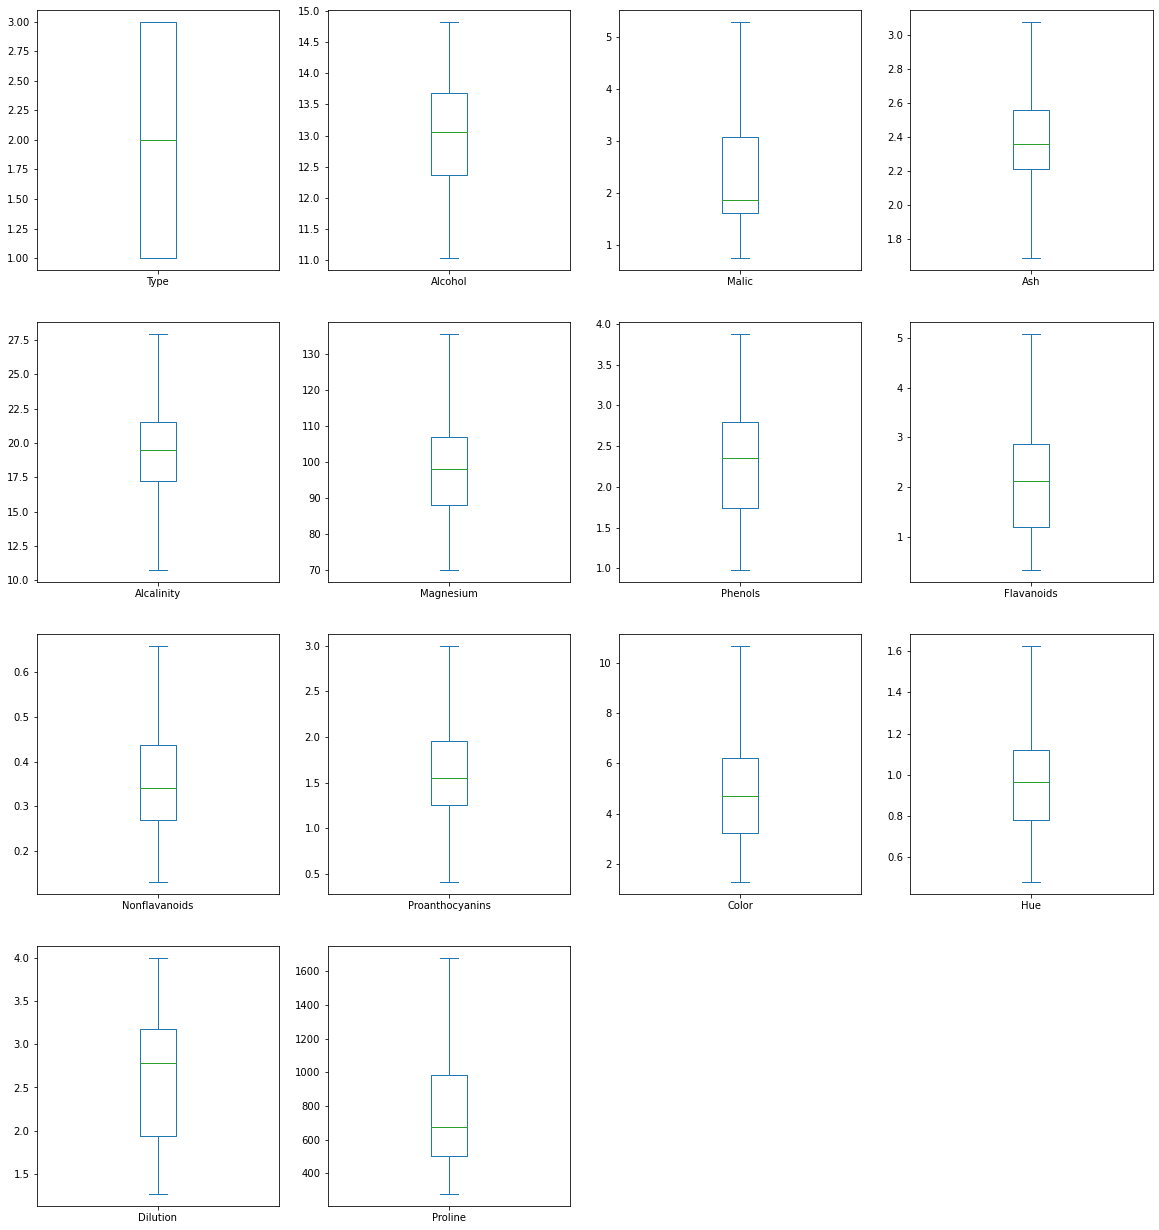

In [38]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

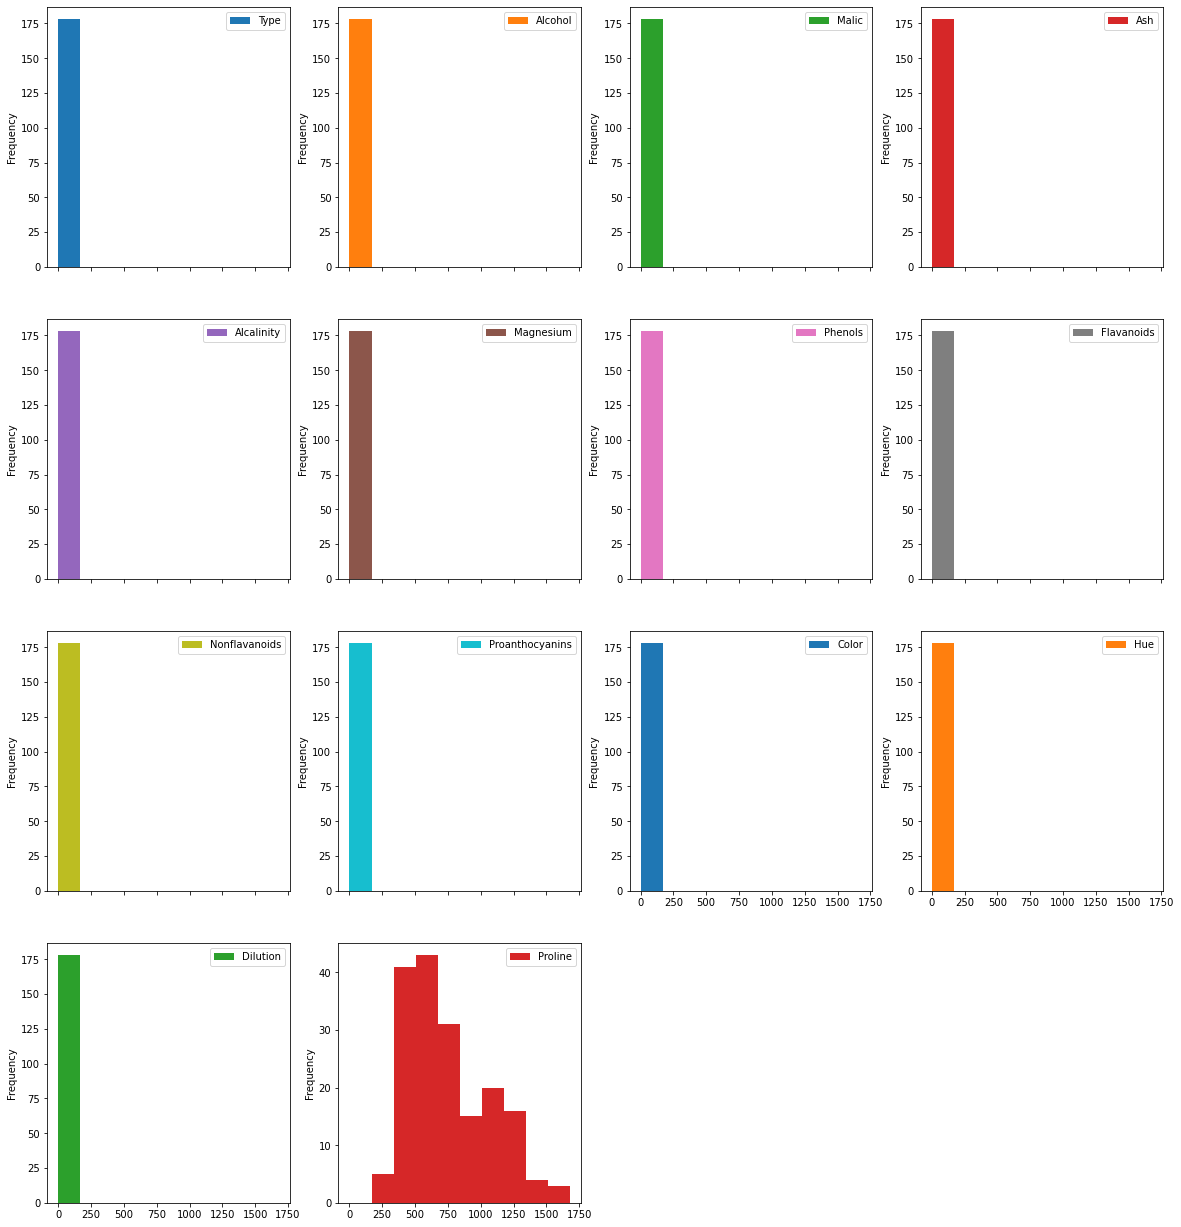

In [39]:
df.plot(kind='hist', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

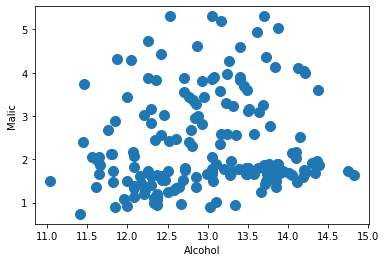

In [40]:
df.plot.scatter(x = 'Alcohol', y = 'Malic', s = 100);

# Normalization

In [41]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [42]:
df_norm = norm_func(df.iloc[:, 0:])

In [43]:
df_norm.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.387517,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.500000,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,1.000000,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# H-Clustering and Dendrogram

In [44]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

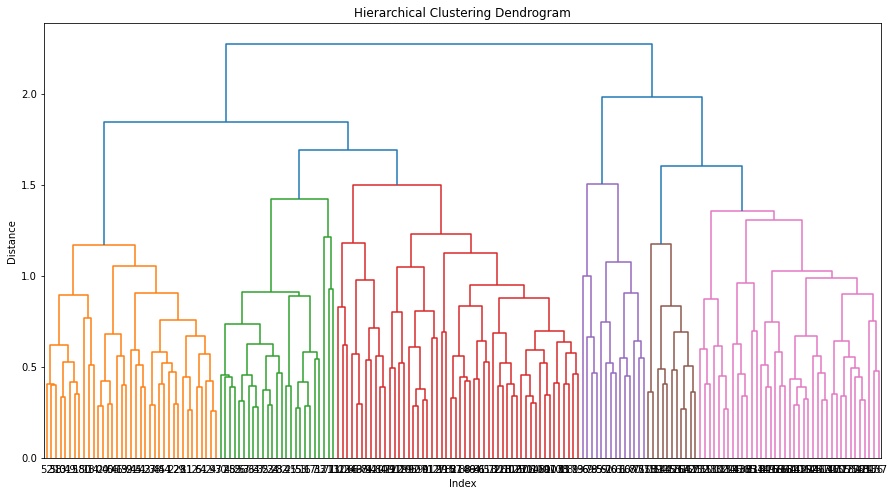

In [45]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation = 0, leaf_font_size = 10)
plt.show()

# Agglomerative Clustering

In [46]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [47]:
c_l = pd.Series(h_complete.labels_)

In [48]:
df['Clust'] = c_l

In [49]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [50]:
df = df.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [51]:
df.head()

,Clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
df.iloc[:, 2:].groupby(df.Clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,13.002807,2.000285,2.378224,18.956579,98.741228,2.616754,2.640439,0.324211,1.804474,4.309474,1.059002,3.056754,815.903509
1,13.144000,3.335100,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.193400,0.686200,1.698800,622.440000
2,12.470714,1.430714,2.062768,17.110714,108.535714,1.882857,1.417857,0.352143,1.342143,3.274286,1.093286,2.247857,629.428571


In [78]:
df.iloc[:, 2:].groupby(df.Clust).median()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,13.050,1.730,2.380,18.8,98.0,2.625,2.665,0.30,1.770,4.225,1.050,3.065,775.0
1,13.135,3.285,2.380,21.0,96.5,1.640,0.695,0.47,1.105,7.400,0.670,1.680,622.5
2,12.350,1.295,1.985,16.9,102.0,1.925,1.340,0.33,1.250,3.110,1.055,2.285,627.5
